# Support Vector Machines

**Support Vector Machines (SVMs)** find the best separating boundary between classes by **maximizing the margin** between them. The data points closest to that boundary are the **support vectors**.

Think of it like drawing the *widest possible hallway* between two groups. The hallway walls are the decision boundaries, and the closest points decide where those walls go.

**Why SVMs?**
- Strong performance on clean, well-separated data
- Focuses on the most informative points (support vectors)
- Interpretable with a linear kernel (weights + margin)

In this notebook, we’ll build a **binary** SVM classifier and explore the margin, support vectors, and performance.


## Setup: Load a Binary Dataset

We’ll use the Iris dataset, but **only two classes** (because our current SVM implementation is binary).


In [1]:
import cuanalytics
from cuanalytics import load_iris_data, split_data, fit_svm

# Load iris data
iris = load_iris_data()

# Keep only two classes for binary classification
binary_df = iris[iris['species'].isin(['Iris-setosa', 'Iris-versicolor'])]

# Train/test split
train_df, test_df = split_data(binary_df, test_size=0.2)

train_df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
55,5.7,2.8,4.5,1.3,Iris-versicolor
88,5.6,3.0,4.1,1.3,Iris-versicolor
26,5.0,3.4,1.6,0.4,Iris-setosa
42,4.4,3.2,1.3,0.2,Iris-setosa
69,5.6,2.5,3.9,1.1,Iris-versicolor


## Step 1: Train Your First SVM

We’ll start with the default **C = 1.0** (soft margin).

In [2]:
svm = fit_svm(train_df, formula='species ~ .', C=1.0)



SVM Model fitted successfully!
  Classes: ['Iris-setosa', 'Iris-versicolor']
  Features: 4
  Training samples: 80
  Support vectors: 3 (3.8% of training data)
  C parameter: 1.0


## Step 2: Visualize Support Vectors

This plot highlights the support vectors (the square points) and shows the data in 2D using PCA.

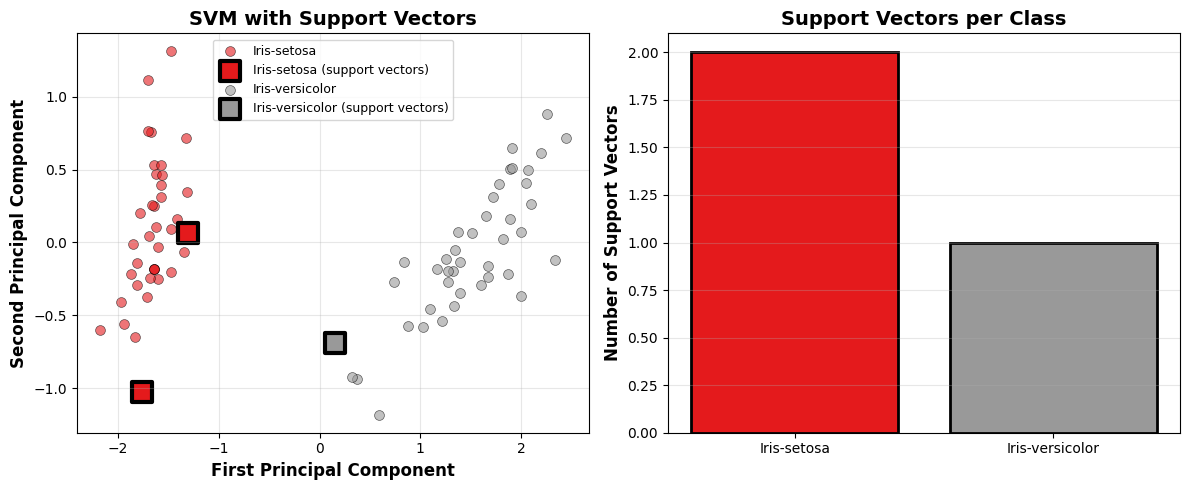


Visualization Notes:
  • Square markers (□) = support vectors (the critical points)
  • Circle markers (●) = regular data points
  • Support vectors define the decision boundary
  • All other points could be removed without changing the model


In [3]:
svm.visualize()


## Step 3: Evaluate Performance

The `score` method now prints and returns a report with the confusion matrix, accuracy, and per‑class metrics.

In [4]:
test_report = svm.score(test_df)

test_report



SCORE REPORT
Accuracy: 100.00%
Kappa: 1.0000

Confusion Matrix:
                        Pred Iris-setosa  Pred Iris-versicolor
Actual Iris-setosa                    12                     0
Actual Iris-versicolor                 0                     8

Per-Class Metrics:
                 precision  recall  sensitivity  specificity     f1
Iris-setosa         1.0000  1.0000       1.0000       1.0000 1.0000
Iris-versicolor     1.0000  1.0000       1.0000       1.0000 1.0000


{'accuracy': np.float64(1.0),
 'kappa': np.float64(1.0),
 'confusion_matrix': array([[12,  0],
        [ 0,  8]]),
 'per_class': {'Iris-setosa': {'precision': np.float64(1.0),
   'recall': np.float64(1.0),
   'sensitivity': np.float64(1.0),
   'specificity': np.float64(1.0),
   'f1': np.float64(1.0)},
  'Iris-versicolor': {'precision': np.float64(1.0),
   'recall': np.float64(1.0),
   'sensitivity': np.float64(1.0),
   'specificity': np.float64(1.0),
   'f1': np.float64(1.0)}}}

## Step 4: Inspect the Support Vectors

Support vectors are the **critical points** that determine the boundary.

In [5]:
support_vectors = svm.get_support_vectors()

support_vectors.head()


,sepal_length,sepal_width,petal_length,petal_width,species
41,4.5,2.3,1.3,0.3,Iris-setosa
23,5.1,3.3,1.7,0.5,Iris-setosa
98,5.1,2.5,3.0,1.1,Iris-versicolor


## Step 5: Visualize the Decision Boundary

Use two features to see the boundary and margin in the original feature space.

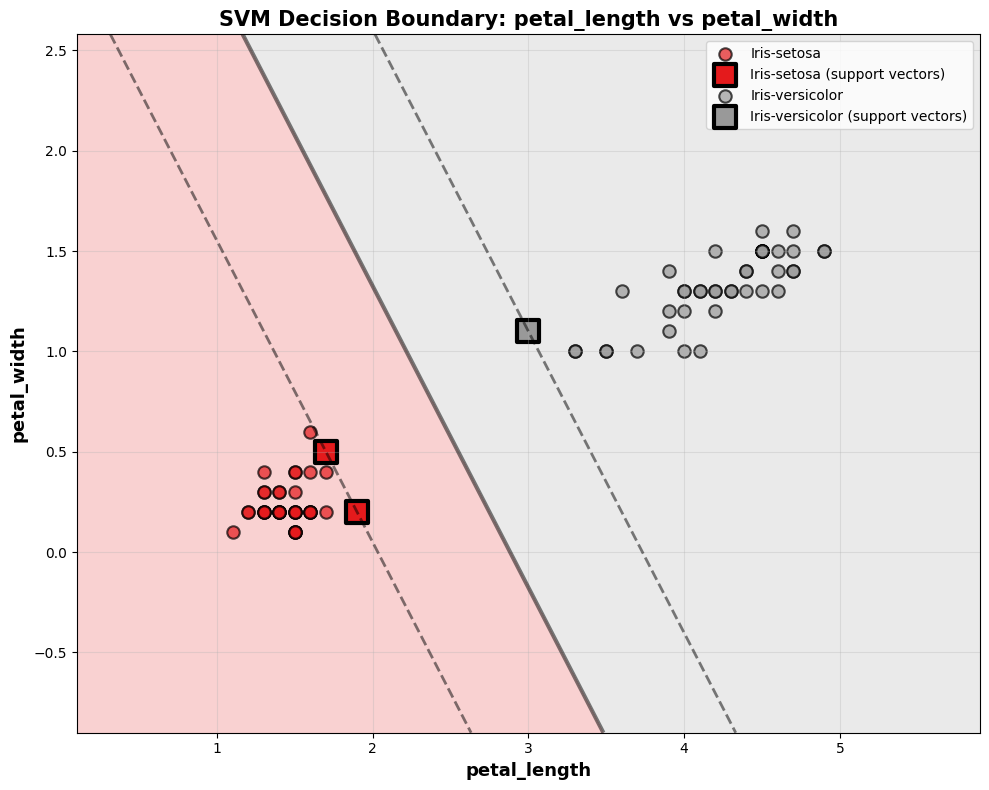


SVM Decision Boundary (2D visualization):
  • Solid line = decision boundary
  • Dashed lines = margin boundaries
  • Square markers (□) = support vectors
  • The region between dashed lines is the 'margin'
  • Margin width: 1.4146
  • Only support vectors affect the boundary position


In [6]:
svm.visualize_features('petal_length', 'petal_width')


## Step 6: Coefficients and Margin Width

With a linear kernel, the SVM has interpretable weights and a margin width.

In [7]:
coefficients = svm.get_coefficients()
margin = svm.get_margin_width()

coefficients


,feature,coefficient
0,sepal_length,0.046391
1,sepal_width,-0.520864
2,petal_length,1.002974
3,petal_width,0.464101


## Step 7: Experiment with the C Parameter

- **Small C** → wider margin, more errors allowed
- **Large C** → tighter margin, fewer training errors


In [8]:
svm_loose = fit_svm(train_df, formula='species ~ .', C=0.1)
svm_strict = fit_svm(train_df, formula='species ~ .', C=10.0)

loose_report = svm_loose.score(test_df)
strict_report = svm_strict.score(test_df)

loose_report['accuracy'], strict_report['accuracy']



SVM Model fitted successfully!
  Classes: ['Iris-setosa', 'Iris-versicolor']
  Features: 4
  Training samples: 80
  Support vectors: 11 (13.8% of training data)
  C parameter: 0.1

SVM Model fitted successfully!
  Classes: ['Iris-setosa', 'Iris-versicolor']
  Features: 4
  Training samples: 80
  Support vectors: 3 (3.8% of training data)
  C parameter: 10.0

SCORE REPORT
Accuracy: 100.00%
Kappa: 1.0000

Confusion Matrix:
                        Pred Iris-setosa  Pred Iris-versicolor
Actual Iris-setosa                    12                     0
Actual Iris-versicolor                 0                     8

Per-Class Metrics:
                 precision  recall  sensitivity  specificity     f1
Iris-setosa         1.0000  1.0000       1.0000       1.0000 1.0000
Iris-versicolor     1.0000  1.0000       1.0000       1.0000 1.0000

SCORE REPORT
Accuracy: 100.00%
Kappa: 1.0000

Confusion Matrix:
                        Pred Iris-setosa  Pred Iris-versicolor
Actual Iris-setosa               

(np.float64(1.0), np.float64(1.0))

## 🎓 Final Challenge

Try different feature pairs and C values. Which combination gives the best test accuracy?


In [9]:
# Your final challenge code here!
# Example:
# svm_custom = fit_svm(train_df, formula='species ~ .', C=0.5)
# svm_custom.visualize_features('sepal_length', 'sepal_width')
# report = svm_custom.score(test_df)
# report['accuracy']


## Key Takeaways

- SVMs focus on **support vectors**, not every point.
- The **margin** is a core idea: wider margins tend to generalize better.
- The **C parameter** controls the tradeoff between margin width and training errors.


## Real‑World Considerations

- SVMs can be sensitive to feature scaling.
- Non‑linear problems can use kernels (not covered here).
- For multi‑class problems, SVMs are often extended with one‑vs‑rest strategies.
